<a href="https://colab.research.google.com/github/HazemmoAlsady/-End-to-End-Predictive-Analytics-Project/blob/main/Airbnb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Step 1: Problem Statement

المشكلة:
شركات التجارة الإلكترونية محتاجة تتوقع حجم المبيعات علشان:

تخطط للمخزون

تحسن الأرباح

تفهم سلوك الشراء

الهدف (Target):
التنبؤ بقيمة Sales / Revenue بناءً على خصائص الطلب.

# **Setup & Load Dataset**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df = pd.read_csv("/content/Ecommerce_Sales_Prediction_Dataset.csv")
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


# **Dataset Overview**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [50]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


# **Data Preprocessing**

In [51]:
df.isnull().sum()


,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [52]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

df.drop('Date', axis=1, inplace=True)


In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['Product_Category', 'Customer_Segment']:
    df[col] = encoder.fit_transform(df[col])


# **Feature ENgineering**

In [54]:
df['Effective_Price'] = df['Price'] * (1 - df['Discount'] / 100)


In [55]:
df['Revenue'] = df['Effective_Price'] * df['Units_Sold']


# **Exploratory Data Analysis (EDA)**

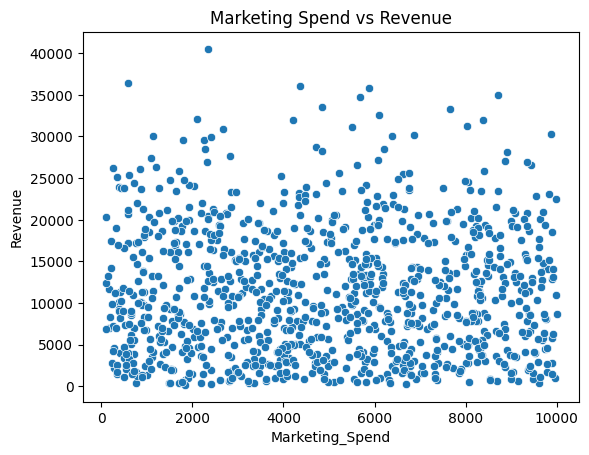

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Marketing_Spend', y='Revenue', data=df)
plt.title("Marketing Spend vs Revenue")
plt.show()


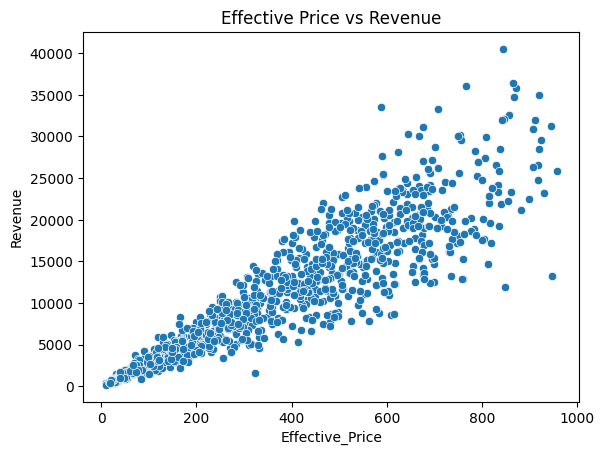

In [57]:
sns.scatterplot(x='Effective_Price', y='Revenue', data=df)
plt.title("Effective Price vs Revenue")
plt.show()


# **Feature Selection**

In [58]:
X = df[
    ['Effective_Price', 'Discount', 'Marketing_Spend', 'Day', 'Month']
]

y = df['Revenue']


# **Train-Test Split**

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# **Build Predictive Models**

In [60]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



In [62]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)



# **Model Evaluation**

In [63]:
def evaluate(name, y_true, y_pred):
    print(name)
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2:", r2_score(y_true, y_pred))
    print("-" * 30)
evaluate("Linear Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("Random Forest", y_test, rf_pred)


Linear Regression
MAE: 2192.565811023649
RMSE: 3204.2808485972773
R2: 0.8246490893649916
------------------------------
Decision Tree
MAE: 3125.94239003
RMSE: 4595.462101405985
R2: 0.6393339569642887
------------------------------
Random Forest
MAE: 2316.9255476433777
RMSE: 3403.243262398406
R2: 0.8021970045001422
------------------------------


# **Final Visualization**

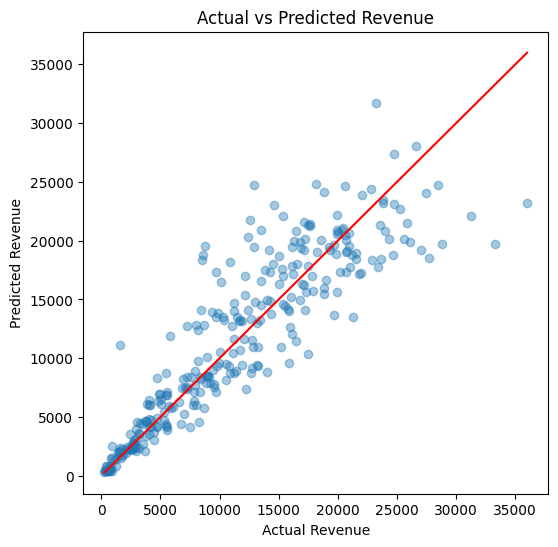

In [64]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red'
)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


# **Prediction**

In [65]:
sample = X_test.iloc[0:1]

print("Actual Revenue:", y_test.iloc[0])
print("Predicted Revenue:", rf.predict(sample)[0])


Actual Revenue: 27701.730862999997
Predicted Revenue: 18522.312148153334


In [66]:
sample = X_test.iloc[0:1]
actual_price = y_test.iloc[0]

predicted_price = rf.predict(sample)

print("Actual Price:", actual_price)
print("Predicted Price:", int(predicted_price[0]))


Actual Price: 27701.730862999997
Predicted Price: 18522
